In [1]:
# importing warning libraries
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing neccessay data analysis libraries
import numpy as np
import pandas as pd

# importing data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# importing neccessary libraries for modeling
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# importing libraries for hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import cut_tree
from scipy.cluster.hierarchy import dendrogram

## Data Inspection

In [4]:
# reading the data
country_dataframe = pd.read_csv('Country-data.csv')

In [5]:
# analyzing the dataframe
country_dataframe.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
# analyzing the shape of the dataframe
country_dataframe.shape

(167, 10)

In [7]:
# analyzing the info of the dataframe
country_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [8]:
# analyzing the columns of the dataframe
country_dataframe.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [9]:
# analyzing the values of the dataframe
country_dataframe.values

array([['Afghanistan', 90.2, 10.0, ..., 56.2, 5.82, 553],
       ['Albania', 16.6, 28.0, ..., 76.3, 1.65, 4090],
       ['Algeria', 27.3, 38.4, ..., 76.5, 2.89, 4460],
       ...,
       ['Vietnam', 23.3, 72.0, ..., 73.1, 1.95, 1310],
       ['Yemen', 56.3, 30.0, ..., 67.5, 4.67, 1310],
       ['Zambia', 83.1, 37.0, ..., 52.0, 5.4, 1460]], dtype=object)

In [10]:
# analyzing the describe of the numerical columns of entire dataframe
country_dataframe.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [11]:
# analyzing the datatypes of the dataframe
country_dataframe.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

- From above data types of the columns we can see that all the columns have been correctly mapped to their respective nature of data types. Hence no data types modifications needs to be done.

## Data columns modification

- As per the data dictionary the columns Exports, Imports and Health are mentioned in percentage of gdpp which need to changed into numbers.

In [12]:
# analyzing the dataframe again
country_dataframe.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [13]:
# Data column modification of exports
country_dataframe['exports'] = (country_dataframe['exports'] * country_dataframe['gdpp'])/100

In [14]:
# Data column modification of health
country_dataframe['health'] = (country_dataframe['health']*country_dataframe['gdpp'])/100

In [15]:
# Data nmodification of imports
country_dataframe['imports'] = (country_dataframe['imports']*country_dataframe['gdpp'])/100

In [16]:
# checking the dataframe after data modification in the above columns
country_dataframe.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


## EDA Process

#### Checking for missing values in the data

In [17]:
# checing for any null values in the dataframe
country_dataframe.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

- From above we can see that there are no null values in any of the columns. Hence missing value treatment need not to be done.

#### Univariate analysis of the variables

- Let's analyze the variation in each variable using univariate analysis.

In [18]:
# analyzing the dataframe again
country_dataframe.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [19]:
# analyzing the describe of all the numerical columns in the data
country_dataframe.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


- From the above statistical summary of the variables we can get to know the variation of the variables over the range of percentile. In most of the variables the variation of the data is steady over the percentiles. Hence it is an indication of presence of outliers. Let's further analyze the variation of the variables using box plots which will help in easy indentifcation of outliers in every variables.

In [20]:
# defining the numerical columns of the data
numerical_columns_list = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
numerical_columns_list

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

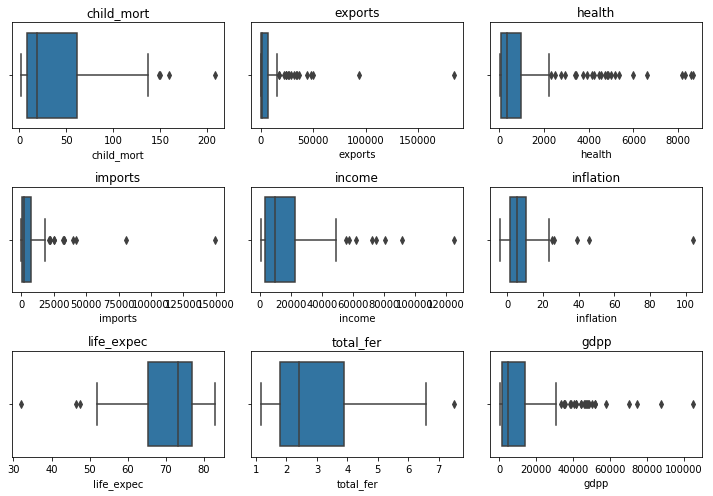

In [21]:
# defining the box plots of all the numerical variables for analyzing the spread of the variables
plt.figure(figsize= (10,7))
for index, column_name in enumerate(numerical_columns_list):
    plt.subplot(3,3,index+1)
    plt.title(column_name)
    sns.boxplot(country_dataframe[column_name])
plt.tight_layout()
plt.show()

- From the above box plot observations of all variables we can see that there exists considerable number of outliers in every variable. Let's treat the outliers further in outlier treatment process.

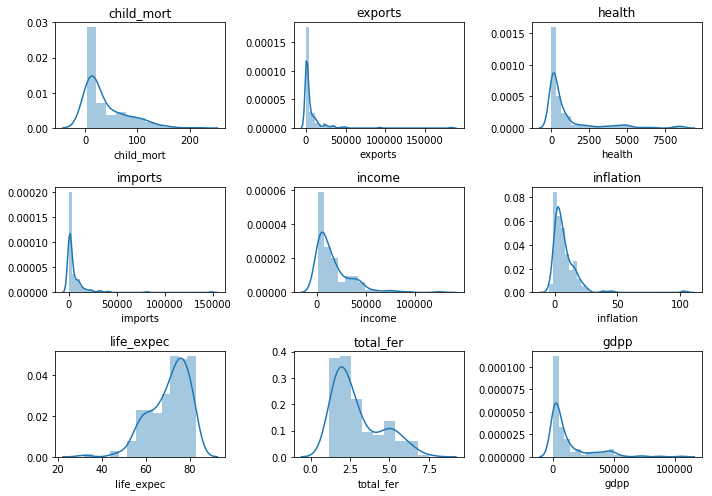

In [22]:
# analyzing the distribution of the numerical variables
plt.figure(figsize=(10,7))
for index, column_name in enumerate(numerical_columns_list):
    plt.subplot(3,3,index+1)
    plt.title(column_name)
    sns.distplot(country_dataframe[column_name])
plt.tight_layout()
plt.show()

- From the aboev distribution plots of variables we can see that most of the variables distribution have been skewed either to their right or left. Some distributios like life_expec and total_fert have compartively larger standard deviation when compared to other variable distributions. On the other hand some variable distributions have sharp peak i.e. small standard deviation like exports, imports, health, gdpp and inflation and some have decent standard deviation like child_mort and income.

#### Bivariate analysis of variables

- Let's analyze the variation in relations in relation with one another variables using bivariate analysis.

In [23]:
# analyzing the dataframe again
country_dataframe.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


- There exists only on categorical variable which is country rest all other variables are numerical variables. Hence possible bivariate analysis are __numerical to numerical__ and __numerical to categorical(country)__.

#### Numerical to Categorical analysis

- Analyzing the variation of country in reference to all other numerical variables

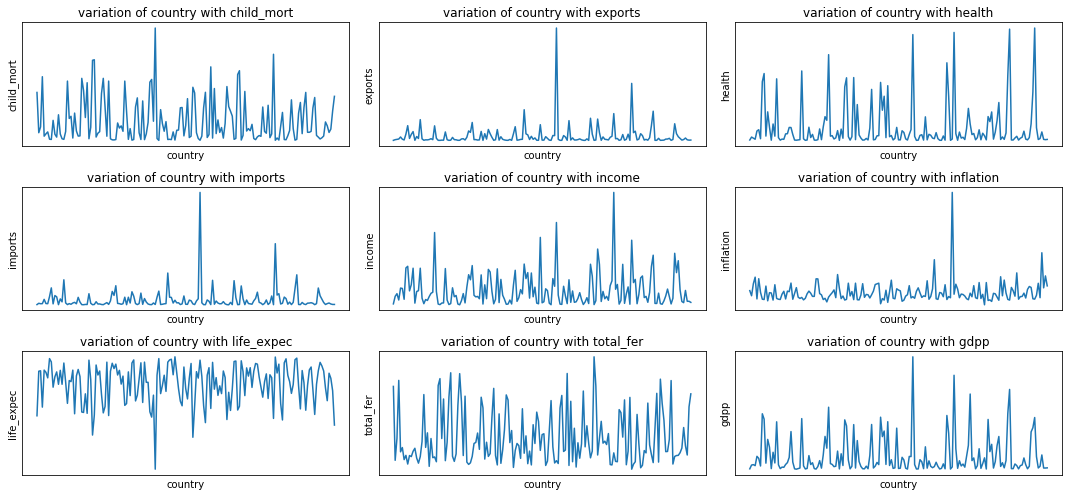

In [24]:
plt.figure(figsize=(15,7))
for index, column_name in enumerate(numerical_columns_list):
    plt.subplot(3,3,index+1)
    plt.title('variation of country with'+ ' '+column_name)
    plt.xlabel('country')
    plt.ylabel(column_name)
    plt.plot(country_dataframe['country'], country_dataframe[column_name])
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

- The above plots show the variation of numerical variables across different countries and the following observations can be made:
- The variation of child mortality is more across the countries
- There doesn't exists much variation of exports across counturies excpet there is one country in which the exports are more which resulted in huge peak because of presence of some extreme values in exports we can observe some huge peaks.
- Also there is significant variation in health across the countries.
- Similar to exports the variation in imports across the countries is not much excpet from one country.
- There exists significant variation of income across the countries as well.
- Similar to exports and imports there is no muxh variation in inflation across the countries excpet from one country.
- Similarly there exists significant variation of life expentancy, total fertility and gdpp across countries.

#### Numerical to Numerical analysis

- When doing numerical to numerical analysis the possible plots can be plotted to undertstand the variation in pairwise numerical vaiables:
- Pairplot
- Pairwise correlation plots

<Figure size 1080x504 with 0 Axes>

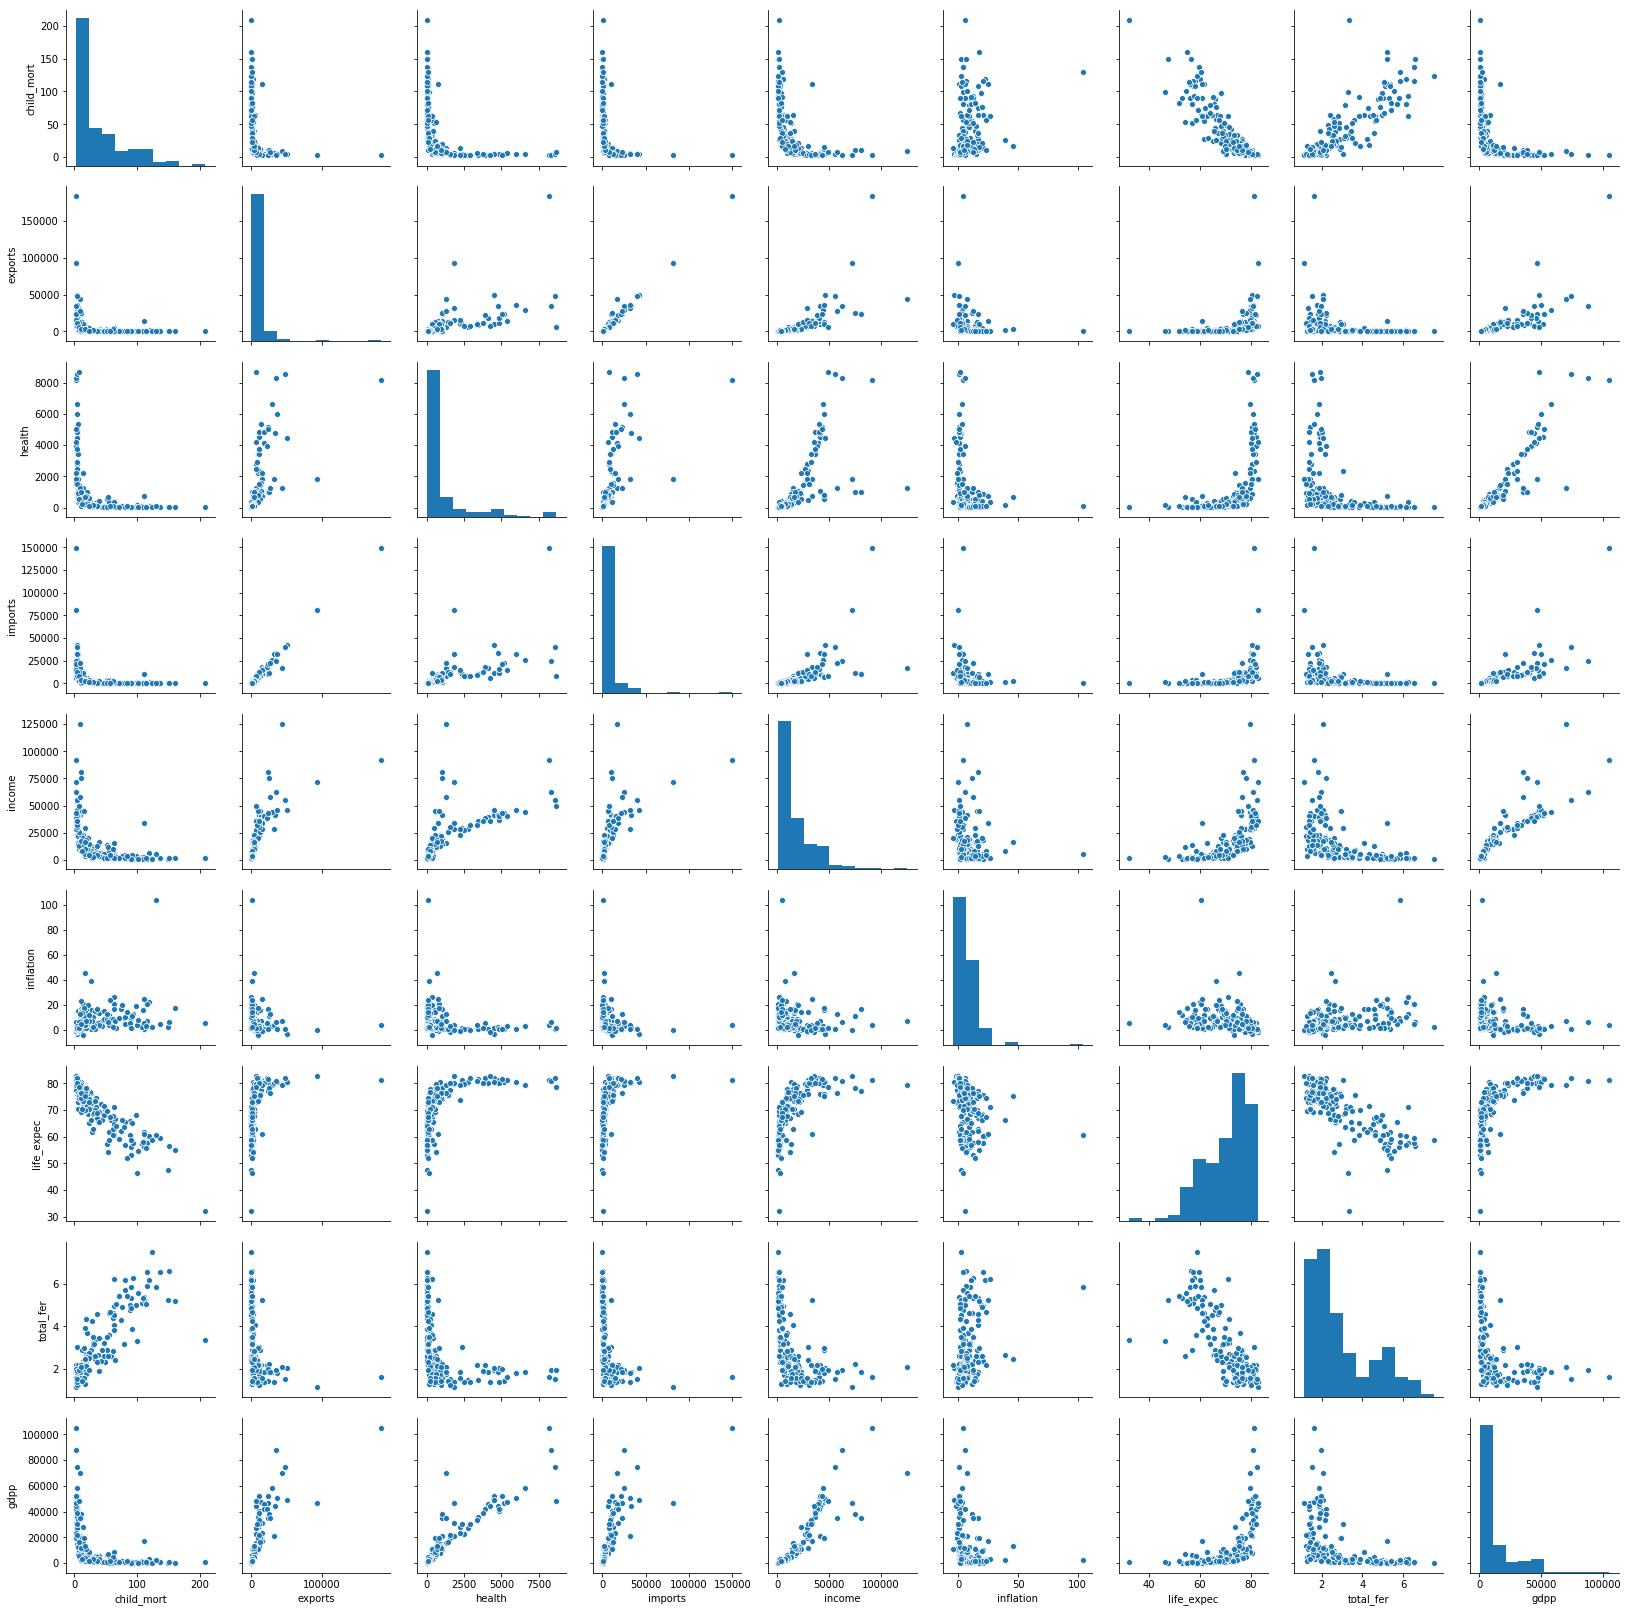

In [25]:
# analyzing the numerical variables in data using pairplot
plt.figure(figsize=(15,7))
sns.pairplot(country_dataframe)

- From the above plot we can see the variation of numerical variables with all possible pairs of numerical variables using pairplot. In order to quantify the variation between the pairwise numerical variables we can plot heatmap and check pair wise correlations between the numerical variables.

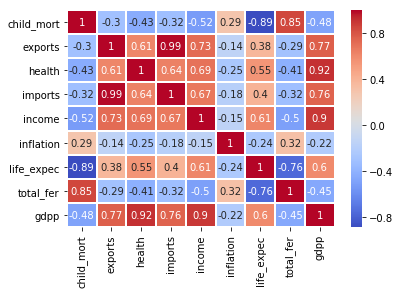

In [26]:
# plotting heat map

# creating matrix of numerical variables
numerical_matrix =  country_dataframe.corr()

# plotting the heatmap 
sns.heatmap(numerical_matrix, cmap = 'coolwarm', annot = True, linecolor= 'white', linewidths= 1)

- From above correlation plot we can see the pair wise correlations between the variables. The following observations can be made as follows:
- There exists strong positive correlation between chil_mort and total_fert and life_expect.
- There exists very strong positive correlation between exports and imports and also between exports and gdpp, income.
- There exists strong positive correlation between health and gdpp.
- There exists strong correlation between income and gdpp.
- There exists strong negative correlation between life_expect and chil_mort.
- There exists strong positive correlation between total_fert and chil_mort.

## Outlier Treatment

__The possible methods in analyzing and treating the outliers are using:__
-  Statistical methods like IQR and Z score analysis
- Domain understanding treatment
- Capping the outliers using statistical methods

In [27]:
# analyzing the dataframe again
country_dataframe.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


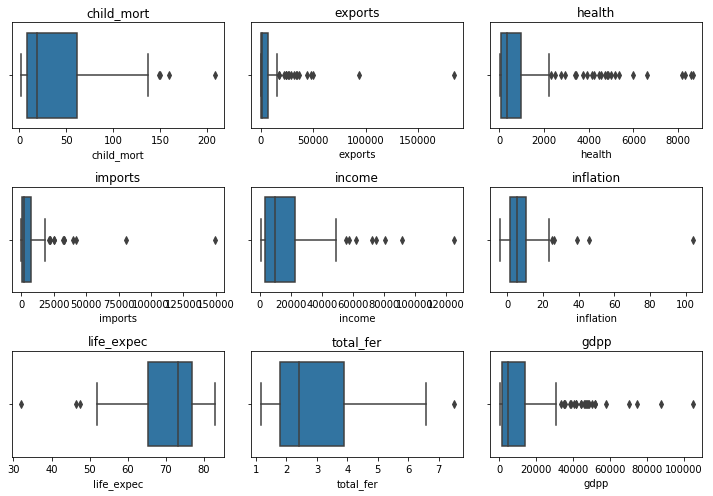

In [28]:
# analyzing the box plot varaition of numerical variables again
plt.figure(figsize=(10,7))
for index, column_name in enumerate(numerical_columns_list):
    plt.subplot(3,3,index+1)
    plt.title(column_name)
    sns.boxplot(country_dataframe[column_name])
plt.tight_layout()
plt.show()

#### Statistical method of treating the outliers

###### Treating outliers in child_mort

In [29]:
# analyzing the quantile values of the variable
country_dataframe['child_mort'].quantile([0.10,0.25,0.50,0.75,0.90,0.95,0.99])

0.10      4.20
0.25      8.25
0.50     19.30
0.75     62.10
0.90    100.22
0.95    116.00
0.99    153.40
Name: child_mort, dtype: float64

In [30]:
# measuring the quantile values
Q1_child_mort = country_dataframe['child_mort'].quantile(0.01)
Q4_child_mort = country_dataframe['child_mort'].quantile(0.99)
print('Q1:{}'.format(Q1_child_mort))
print('Q4:{}'.format(Q4_child_mort))

Q1:2.8
Q4:153.40000000000003


- As per the box plot visualization in child_mort we only have upper end outliers hence we will check for upper outliers and if neccessary cap them to the closed percentile value.

In [31]:
# checking for upper outliers
country_dataframe[country_dataframe['child_mort']>= Q4_child_mort]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.45,32.1,3.33,662
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220,17.20,55.0,5.20,399


- The above countries have extremely high child mortality rate and these are the countries which need financial aid from the organization in priority. Hence it will not be meaningful in removing these values in outlier treatment hence as an alternative we will cap these higher values to the closed percentile value.

In [32]:
# capping the higher outliers to closest percentile value i.e. Q3
country_dataframe.loc[country_dataframe['child_mort']>= Q4_child_mort, 'child_mort'] = Q4_child_mort

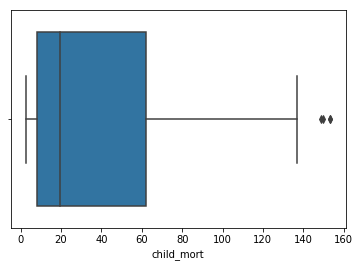

In [33]:
# checking the variation of the variable after capping using box plot
sns.boxplot(country_dataframe['child_mort'])

- From the above plot we can see that upon capping now the extreme outliers have been eliminated. These kind of values are accpetable as these are not extremely away from the boxplot and just some considerable high values.

###### Treating the outliers in exports

In [34]:
# analyzing the quantile values of the column
country_dataframe['exports'].quantile([0.10,0.25,0.50,0.75,0.90,0.95,0.99])

0.10      110.2248
0.25      447.1400
0.50     1777.4400
0.75     7278.0000
0.90    17760.6000
0.95    31385.1000
0.99    64794.2600
Name: exports, dtype: float64

In [35]:
# Measuring the quantiles for the variables
Q1_exports = country_dataframe['exports'].quantile(0.01)
Q4_exports = country_dataframe['exports'].quantile(0.95)
print('Q1:{}'.format(Q1_exports))
print('Q4:{}'.format(Q4_exports))

Q1:22.243716000000003
Q4:31385.09999999997


- As per the box plot there are no lower outliers hence we will only check for upper outliers.

In [36]:
# analyzing the upper outliers
country_dataframe[country_dataframe['exports']>= Q4_exports]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
15,Belgium,4.5,33921.6,4750.80,33166.8,41100,1.880,80.0,1.86,44400
73,Ireland,4.2,50161.0,4475.53,42125.5,45700,-3.220,80.4,2.05,48700
91,Luxembourg,2.8,183750.0,8158.50,149100.0,91700,3.620,81.3,1.63,105000
98,Malta,6.8,32283.0,1825.15,32494.0,28300,3.830,80.3,1.36,21100
110,Netherlands,4.5,36216.0,5985.70,31990.8,45500,0.848,80.7,1.79,50300
114,Norway,3.2,34856.6,8323.44,25023.0,62300,5.950,81.0,1.95,87800
123,Qatar,9.0,43796.9,1272.43,16731.4,125000,6.980,79.5,2.07,70300
133,Singapore,2.8,93200.0,1845.36,81084.0,72100,-0.046,82.7,1.15,46600
145,Switzerland,4.5,47744.0,8579.00,39761.8,55500,0.317,82.2,1.52,74600


- Since these are extermely high values we will prefer to cap them rather than removing.

In [37]:
# capping the extreme outliers
country_dataframe.loc[country_dataframe['exports']>= Q4_exports, 'exports'] = Q4_exports

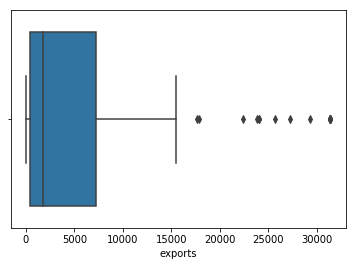

In [38]:
# checking the variation of values using boxplot after capping
sns.boxplot(country_dataframe['exports'])

##### Treating outliers in health

In [39]:
# analyzing the quantile variation of variable
country_dataframe['health'].quantile([0.10,0.25,0.50,0.75,0.80,0.85,0.90,0.95,0.99])

0.10      36.50256
0.25      78.53550
0.50     321.88600
0.75     976.94000
0.80    1274.64600
0.85    2202.66600
0.90    3825.41600
0.95    4966.70100
0.99    8410.33040
Name: health, dtype: float64

- As per the above variation in the variable we can see that there is an sudden increase in value from 95th percentile to 99 percentile. Hence it would be better to consider quartilr value as 95th percentile for capping the values.

- Since there exists only upper outliers as the boxplot. Hence we cap the upper outliers to the closed percentile value.

In [40]:
# consider quantile value for capping
Q4_health = country_dataframe['health'].quantile(0.95)
print(Q4_health)

4966.700999999998


In [41]:
# capping the exterme outliers in health
country_dataframe.loc[country_dataframe['health']>= Q4_health, 'health'] = Q4_health

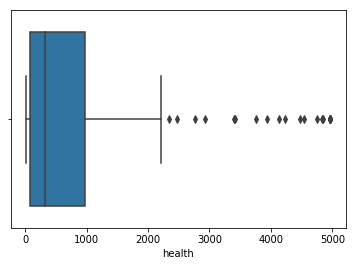

In [42]:
# analyzing the variation in box plot after capping
sns.boxplot(country_dataframe['health'])

###### Treating the outliers in imports

In [43]:
# analyzing the variation of variable across different quantiles
country_dataframe['imports'].quantile([0.10,0.25,0.50,0.75,0.80,0.85,0.90,0.95,0.99])

0.10      211.0056
0.25      640.2150
0.50     2045.5800
0.75     7719.6000
0.80     9854.7200
0.85    11434.1400
0.90    15034.2800
0.95    24241.5600
0.99    55371.3900
Name: imports, dtype: float64

- Upon observing the variation in the variable we can see that there has been sudden increase in value from 95th percentile to 99th percentile. Hence it would be better to consider 95th percentile value for capping.
- Also in imports there exists only upper outliers hence it would be sufficient to cap upper outliers.

In [44]:
# measuring the quantile value for capping
Q4_imports = country_dataframe['imports'].quantile(0.95)
print(Q4_imports)

24241.55999999997


In [45]:
# analyzing the upper outliers in imports
country_dataframe[country_dataframe['imports']>= Q4_imports]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
15,Belgium,4.5,31385.1,4750.800,33166.8,41100,1.880,80.0,1.86,44400
44,Denmark,4.1,29290.0,4966.701,25288.0,44000,3.220,79.5,1.87,58000
73,Ireland,4.2,31385.1,4475.530,42125.5,45700,-3.220,80.4,2.05,48700
91,Luxembourg,2.8,31385.1,4966.701,149100.0,91700,3.620,81.3,1.63,105000
98,Malta,6.8,31385.1,1825.150,32494.0,28300,3.830,80.3,1.36,21100
110,Netherlands,4.5,31385.1,4966.701,31990.8,45500,0.848,80.7,1.79,50300
114,Norway,3.2,31385.1,4966.701,25023.0,62300,5.950,81.0,1.95,87800
133,Singapore,2.8,31385.1,1845.360,81084.0,72100,-0.046,82.7,1.15,46600
145,Switzerland,4.5,31385.1,4966.701,39761.8,55500,0.317,82.2,1.52,74600


In [46]:
# capping the upper outliers
country_dataframe.loc[country_dataframe['imports']>= Q4_imports, 'imports'] = Q4_imports

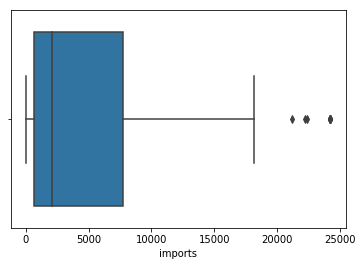

In [47]:
# analyzing the variation of the variable after capping
sns.boxplot(country_dataframe['imports'])

- The exterme outliers have been capped to the nearest possible quantile value. Still there exists some outliers but these are acceptable outliers as these are just considerable high values.

###### Treating outliers in income

In [48]:
# analyzing the variation of variable across different quantiles
country_dataframe['income'].quantile([0.10,0.25,0.50,0.75,0.80,0.85,0.90,0.95,0.99])

0.10     1524.0
0.25     3355.0
0.50     9960.0
0.75    22800.0
0.80    29420.0
0.85    36200.0
0.90    41220.0
0.95    48290.0
0.99    84374.0
Name: income, dtype: float64

- From the above variation in quantiles of the variable we can see that there has been drastic increase in values from 95th percentile to 99th percentile. Hence it would be better to cap the extreme outliers close to 95th percentile as upto 95th percentile there has been steady increase in values.
- Also as per box plot we can see that there exists only upper outliers in income hence it would be sufficient to cap upper outliers.

In [49]:
# measuring the quantile value for capping
Q4_income = country_dataframe['income'].quantile(0.95)
print(Q4_income)

48289.999999999956


In [50]:
# analyzing the upper outliers in income
country_dataframe[country_dataframe['income']>= Q4_income]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
23,Brunei,10.5,23792.2,1002.520,9884.00,80600,16.700,77.1,1.84,35300
82,Kuwait,10.8,25679.5,1012.550,11704.00,75200,11.200,78.2,2.21,38500
91,Luxembourg,2.8,31385.1,4966.701,24241.56,91700,3.620,81.3,1.63,105000
114,Norway,3.2,31385.1,4966.701,24241.56,62300,5.950,81.0,1.95,87800
123,Qatar,9.0,31385.1,1272.430,16731.40,125000,6.980,79.5,2.07,70300
133,Singapore,2.8,31385.1,1845.360,24241.56,72100,-0.046,82.7,1.15,46600
145,Switzerland,4.5,31385.1,4966.701,24241.56,55500,0.317,82.2,1.52,74600
157,United Arab Emirates,8.6,27195.0,1281.000,22260.00,57600,12.500,76.5,1.87,35000
159,United States,7.3,6001.6,4966.701,7647.20,49400,1.220,78.7,1.93,48400


In [51]:
# capping the upper outliers in income
country_dataframe.loc[country_dataframe['income']>= Q4_income, 'income'] = Q4_income

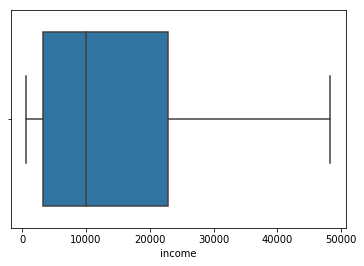

In [52]:
# checking the variation in the variable after capping
sns.boxplot(country_dataframe['income'])

- From the above box plot we can see that upon capping the complete outliers have been removed.

###### Treating outliers in inflation

In [53]:
# analyzing the variation of variable across different quantiles
country_dataframe['inflation'].quantile([0.10,0.25,0.50,0.75,0.80,0.85,0.90,0.95,0.99])

0.10     0.5878
0.25     1.8100
0.50     5.3900
0.75    10.7500
0.80    12.5000
0.85    15.3300
0.90    16.6400
0.95    20.8700
0.99    41.4780
Name: inflation, dtype: float64

- From the above variation in the variable we can see that there has been sudden increase in value from 95th percentile to 99th percentile. Hence it would be better to consider capping value to 95th percentile and cap all the values above 95th percentile.
- Also from boxplot of inflation we can see that there exists only upper outlier. Hence it would be sufficient to cap upper end outliers.

In [54]:
# measuring the quantile value in inflation
Q4_inflation = country_dataframe['inflation'].quantile(0.95)
print(Q4_inflation)

20.869999999999997


In [55]:
# analyzing the upper end outliers in inflation
country_dataframe[country_dataframe['inflation']>= Q4_inflation]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
3,Angola,119.0,2199.19,100.605,1514.37,5900.0,22.4,60.1,6.16,3530
5,Argentina,14.5,1946.70,834.300,1648.00,18700.0,20.9,75.8,2.37,10300
49,Equatorial Guinea,111.0,14671.80,766.080,10071.90,33700.0,24.9,60.9,5.21,17100
103,Mongolia,26.1,1237.55,144.160,1502.55,7710.0,39.2,66.2,2.64,2650
113,Nigeria,130.0,589.49,118.131,405.42,5150.0,104.0,60.5,5.84,2330
140,Sri Lanka,11.2,550.76,82.614,753.08,8560.0,22.8,74.4,2.20,2810
149,Timor-Leste,62.6,79.20,328.320,1000.80,1850.0,26.5,71.1,6.23,3600
163,Venezuela,17.1,3847.50,662.850,2376.00,16500.0,45.9,75.4,2.47,13500
165,Yemen,56.3,393.00,67.858,450.64,4480.0,23.6,67.5,4.67,1310


In [56]:
# capping the upper end outliers in inflation
country_dataframe.loc[country_dataframe['inflation']>= Q4_inflation, 'inflation'] = Q4_inflation

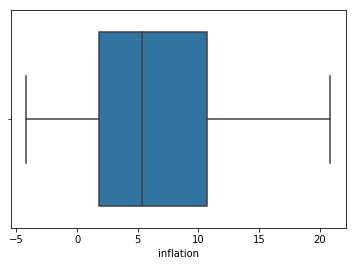

In [57]:
# checking the variation in the variable after capping
sns.boxplot(country_dataframe['inflation'])

- From the above box plot we can see that after capping all the outliers have been removed.

###### Treating the outliers in life_expec

In [58]:
# analyzing the variation of variable across different quantiles
country_dataframe['life_expec'].quantile([0.01,0.05,0.10,0.25,0.50,0.75,0.80,0.85,0.90,0.95,0.99])

0.01    47.16
0.05    55.78
0.10    57.82
0.25    65.30
0.50    73.10
0.75    76.80
0.80    78.20
0.85    79.91
0.90    80.40
0.95    81.40
0.99    82.37
Name: life_expec, dtype: float64

- From the above variation in quantiles we can see that there has been steady increase in values. Hence no upper end outliers in life_expec. But as per boxplot we can see that there exists some lower end outliers. Which can be capped to 1st percentile value.

In [59]:
# measuring the lower quantile value for capping
Q1_life_expec = country_dataframe['life_expec'].quantile(0.01)
print(Q1_life_expec)

47.160000000000004


In [60]:
# analyzing the lower end outliers
country_dataframe[country_dataframe['life_expec']<= Q1_life_expec]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,153.4,101.286,45.7442,428.314,1500.0,5.45,32.1,3.33,662
87,Lesotho,99.7,460.980,129.8700,1181.700,2380.0,4.15,46.5,3.30,1170


In [61]:
# capping the lower end outliers
country_dataframe.loc[country_dataframe['life_expec']<= Q1_life_expec, 'life_expec'] = Q1_life_expec

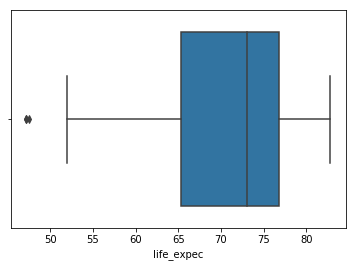

In [62]:
# analyzing the variation in variable after capping
sns.boxplot(country_dataframe['life_expec'])

- From the above plot we can see that extreme lower end outliers have been capped. Though there exists few lower outliers which are acceptable considerable lower outliers.

###### Treating outliers in total_fer

In [63]:
# analyzing the variation of variable across different quantiles
country_dataframe['total_fer'].quantile([0.10,0.25,0.50,0.75,0.80,0.85,0.90,0.95,0.99])

0.10    1.4520
0.25    1.7950
0.50    2.4100
0.75    3.8800
0.80    4.5920
0.85    5.0230
0.90    5.3220
0.95    5.8610
0.99    6.5636
Name: total_fer, dtype: float64

- From above variation in quantiles we can see there exists steady increase in values across the quantiles. Also let's check once again using the describe of the column.

In [64]:
# analyzing the describe of the column
country_dataframe['total_fer'].describe()

count    167.000000
mean       2.947964
std        1.513848
min        1.150000
25%        1.795000
50%        2.410000
75%        3.880000
max        7.490000
Name: total_fer, dtype: float64

- From above we can see there exists only one outlier which is almost similar to 99th percentile value. we can cap the value using 99th percentile.

In [65]:
# measuring the quantile for capping
Q4_totalfer = country_dataframe['total_fer'].quantile(0.99)
print(Q4_totalfer)

6.563599999999999


In [66]:
# capping the one outlier
country_dataframe.loc[country_dataframe['total_fer']>= Q4_totalfer, 'total_fer'] = Q4_totalfer

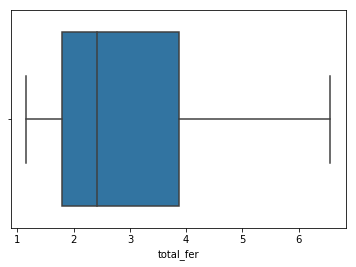

In [67]:
# analyzing the variation of the variable using box plot
sns.boxplot(country_dataframe['total_fer'])

- From above box plot we can see that all the outliers have been capped to the closed quantile value.

###### Treating the outliers in gdpp

In [68]:
# analyzing the variation of variable across different quantiles
country_dataframe['gdpp'].quantile([0.10,0.25,0.50,0.75,0.80,0.85,0.90,0.95,0.99])

0.10      593.8
0.25     1330.0
0.50     4660.0
0.75    14050.0
0.80    21020.0
0.85    31090.0
0.90    41840.0
0.95    48610.0
0.99    79088.0
Name: gdpp, dtype: float64

- From above variation in values across different quantiles we can see that there exists a sudden raise in values from 95th percentile to 99th percentile. Hence 95th percentile value can be used for caping the extreme outliers values.
- Also from the box plot visualization of gdpp we can see that there exists only upper end outliers.

In [69]:
# measuring the quantile value for capping
Q4_gdpp = country_dataframe['gdpp'].quantile(0.95)
print(Q4_gdpp)

48610.0


In [70]:
# analyzing the upper end outliers above Q4_gdpp
country_dataframe[country_dataframe['gdpp']>= Q4_gdpp]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
7,Australia,4.8,10276.2,4530.870,10847.10,41400.0,1.160,82.0,1.93,51900
44,Denmark,4.1,29290.0,4966.701,24241.56,44000.0,3.220,79.5,1.87,58000
73,Ireland,4.2,31385.1,4475.530,24241.56,45700.0,-3.220,80.4,2.05,48700
91,Luxembourg,2.8,31385.1,4966.701,24241.56,48290.0,3.620,81.3,1.63,105000
110,Netherlands,4.5,31385.1,4966.701,24241.56,45500.0,0.848,80.7,1.79,50300
114,Norway,3.2,31385.1,4966.701,24241.56,48290.0,5.950,81.0,1.95,87800
123,Qatar,9.0,31385.1,1272.430,16731.40,48290.0,6.980,79.5,2.07,70300
144,Sweden,3.0,24070.2,4966.701,21204.70,42900.0,0.991,81.5,1.98,52100
145,Switzerland,4.5,31385.1,4966.701,24241.56,48290.0,0.317,82.2,1.52,74600


In [71]:
# capping the upper end outliers
country_dataframe.loc[country_dataframe['gdpp']>= Q4_gdpp, 'gdpp'] = Q4_gdpp

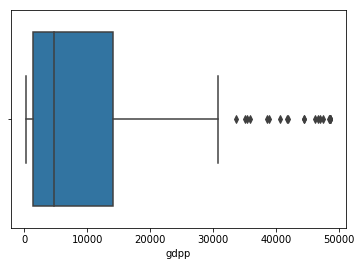

In [72]:
# analyzing the variation after capping the values
sns.boxplot(country_dataframe['gdpp'])

- From above box plot we can see that still there exists some outliers which are just considerably continous high values. Hence such values are acceptable to be considered.

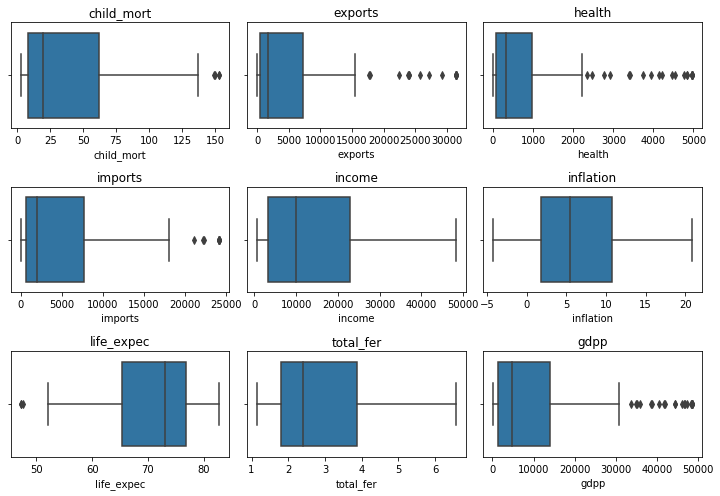

In [73]:
# analyzing all numerical variables after capping
plt.figure(figsize=(10,7))
for index, column_name in enumerate(numerical_columns_list):
    plt.subplot(3,3,index+1)
    plt.title(column_name)
    sns.boxplot(country_dataframe[column_name])
plt.tight_layout()
plt.show()

- After capping also still there exists some outliers which are just continous and considerably high values which can be considered for analysis.

## Data Preprocessing

__In the data preprocessing the following steps are performed:__
- scaling the variables to bring all the variables into one scale
- Cluster tendency estimation using Hopkin's test statistics

In [74]:
# analyzing the dataframe again
country_dataframe.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,20.87,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [75]:
# creating new dataframe including only the numerical variables
numerical_dataframe = country_dataframe[numerical_columns_list]

# analyzing the numerical dataframe
numerical_dataframe.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,119.0,2199.19,100.6050,1514.370,5900.0,20.87,60.1,6.16,3530.0
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


#### scaling the variables in the dataframe

In [76]:
# Initializing the scaler object
scaler = StandardScaler()
# fitting and transforming the data on to the scaler object
numerical_dataframe[::] = scaler.fit_transform(numerical_dataframe)

# analyzing the dataframe after scaling
numerical_dataframe.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.344006,-0.669581,-0.629435,-0.732729,-0.958349,0.394438,-1.693071,1.926396,-0.757362
1,-0.547497,-0.542172,-0.473489,-0.472182,-0.394006,-0.383226,0.662026,-0.865054,-0.523321
2,-0.272510,-0.475838,-0.530017,-0.560152,-0.192552,1.440750,0.685460,-0.034983,-0.498838
3,2.084159,-0.418960,-0.588935,-0.543087,-0.667360,2.190136,-1.236112,2.153997,-0.560376
4,-0.709406,-0.027134,-0.150685,0.306422,0.227992,-0.862393,0.720610,-0.543736,0.013312


#### Cluster tendency estimation of the dataframe using hopkins test

In [77]:
# importing some libraries for performing hopkin's test
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [78]:
# calling the function to get the hopkins value
hopkins_value = hopkins(numerical_dataframe)
hopkins_value

0.8459038287056121

- From above hopkin's value we can see that the hopkins value is close to 1 which is an indication that there exists some spacial distribution of the data is not random hence using this data some meaningful clusters can be formed.

# Modeling using KMeans

#### Finding out optimal values of K using Elbow curve and Silhouette analysis

##### Finding optimal value using Elbow curve

In [79]:
range_n_clusters = list(range(2,9))
cost_list = []
for num_cluster in range_n_clusters:
    # initialing the model object
    kmeans_model = KMeans(n_clusters= num_cluster, max_iter= 100, random_state= 100)
    # fitting the data on top of the model object
    kmeans_model = kmeans_model.fit(numerical_dataframe)
    # estimating the cost associated with each k value of cluster
    cost = kmeans_model.inertia_
    # appending the cost into cost_list
    cost_list.append(cost)

# analyzing the cost_list
cost_list

[753.7255585460114,
 466.8268184954102,
 390.35508578914437,
 337.80322672198486,
 294.55981340965553,
 255.86887245694294,
 223.9982615897811]

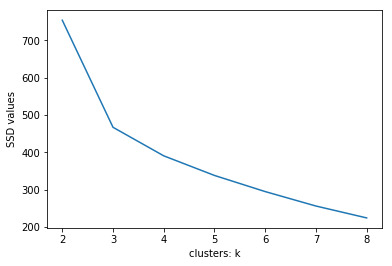

In [80]:
# Plotting the elbow curve across different clusters
plt.plot(range_n_clusters, cost_list)
plt.xlabel('clusters: k')
plt.ylabel('SSD values')
plt.show()

- From the above elbow plot we can see that there has been sudden decrease in cost associated with 2 clusters. From k=3 there is no much decrease in SSD(Sum of Sqaure Distances between the datapoint wrt its cluster center) value or the cost value. Hence K=3 can be considered as optimal value. Let's further check using silhouette analysis also.

#### Silhouette analysis

In [81]:
silhouette_score_list = []
for num_cluster in range_n_clusters:
    # initializing the mode object
    kmeans_model = KMeans(n_clusters= num_cluster, max_iter= 100, random_state= 100)
    # fitting the data on to the model object
    kmeans_model = kmeans_model.fit(numerical_dataframe)
    # checking for the cluster labels
    cluster_labels = kmeans_model.labels_
    # computing the silhouette score
    silhouette_value = silhouette_score(numerical_dataframe, cluster_labels)
    # appending the silhouette value into list
    silhouette_score_list.append(silhouette_value)

# analyzing the silhouette score list
silhouette_score_list

[0.48361787931018174,
 0.4127342623467731,
 0.3807041698022167,
 0.3243002423033582,
 0.30882764457700873,
 0.31120408978159686,
 0.318155483658089]

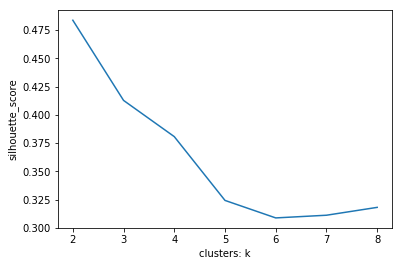

In [82]:
# plotting the silhouette score in relation with k
plt.plot(range_n_clusters, silhouette_score_list)
plt.xlabel('clusters: k')
plt.ylabel('silhouette_score')
plt.show()

- From above plot we can see that silhouette value for k=2 clusters is more but considering k=2 will not be an meaningful clustering process. Hence we will be considering the next higher silhouette score value which is for k=3. Hence we will consider k=3 as the optimal number of clusters.
- Also from Elbow curve we have seen that k=3 could be better choice for the consideration of k as optimal number of clusters.

#### Building the model using k=3 clusters

In [83]:
# Initializing the model object
kmeans_model = KMeans(n_clusters= 3, max_iter= 100, random_state= 100)
# fitting the data on top of the model object
kmeans_model = kmeans_model.fit(numerical_dataframe)

In [84]:
# checking for the cluster labels formed by kmeans
cluster_labels = kmeans_model.labels_
cluster_labels

array([2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 0,
       0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 1, 2, 2, 1,
       2, 1, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2,
       2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       0, 0, 2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2])

In [85]:
# checking the cluster centeriods formed at the end of the clustering process
cluster_centeriods = kmeans_model.cluster_centers_
cluster_centeriods

array([[-0.83950238,  1.51937833,  1.60921767,  1.58156989,  1.55820451,
        -0.68197006,  1.09048428, -0.79431368,  1.70364959],
       [-0.40997232, -0.34999278, -0.38711086, -0.33546432, -0.23292732,
         0.03551119,  0.26808082, -0.4370384 , -0.37791657],
       [ 1.3474858 , -0.57328314, -0.57912424, -0.64604192, -0.80319847,
         0.46502031, -1.29855303,  1.35889073, -0.66762241]])

In [86]:
# creating the dataframe for the cluster centers
cluster_centers_dataframe = pd.DataFrame(cluster_centeriods)
cluster_centers_dataframe.columns = numerical_columns_list
# analyzing the cluster centeriods datafarme
cluster_centers_dataframe

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,-0.839502,1.519378,1.609218,1.581570,1.558205,-0.681970,1.090484,-0.794314,1.703650
1,-0.409972,-0.349993,-0.387111,-0.335464,-0.232927,0.035511,0.268081,-0.437038,-0.377917
2,1.347486,-0.573283,-0.579124,-0.646042,-0.803198,0.465020,-1.298553,1.358891,-0.667622


In [87]:
# adding the column of cluster labels into numerical dataframe
numerical_dataframe['Cluster_labels'] = cluster_labels
# adding the column of cluster labels into country_dataframe
country_dataframe['Cluster_labels'] = cluster_labels

In [88]:
# analyzing the country dataframe after creating of column
country_dataframe.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,20.87,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


In [89]:
# analyzing the value counts present in each cluster
country_dataframe['Cluster_labels'].value_counts()

1    82
2    48
0    37
Name: Cluster_labels, dtype: int64

- From above value counts we can see that how many datapoints in each cluster.

#### Visualization of clusters formed across the variables

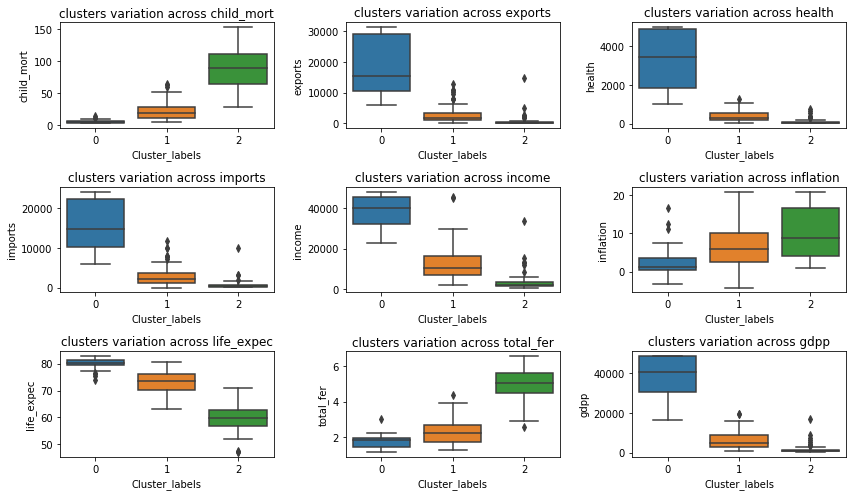

In [90]:
# visualization of clusters formed across the variables using box plots
plt.figure(figsize=(12,7))
for index, column_name in enumerate(numerical_columns_list):
    plt.subplot(3,3,index+1)
    plt.title('clusters variation across'+' '+column_name)
    sns.boxplot('Cluster_labels', column_name, data  = country_dataframe)
plt.tight_layout()
plt.show()

- As per the assignment when taking into consideration of variables like Income, gdpp and child_mort for determing the priotity countries which need the financial aid. Upon observing the clusters formed across these varuiables we can see that countries in __cluster 2__ require the financial aid in priority as they have low gdpp, low income and high child_mort. Let's further observe these variables using clusters formed.

#### Analyzing the visual variations between driving variables [income, gdpp, child_mort]

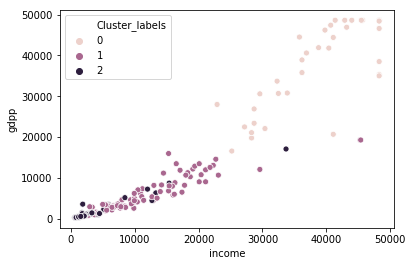

In [91]:
# analyzing the variation between income and gdpp using hue as cluster labels
sns.scatterplot(x = country_dataframe['income'], y= country_dataframe['gdpp'], hue= country_dataframe['Cluster_labels'])

- From the above scatter plot between the income and gdpp we can see that at the bottom end i.e. low gdpp and low income there are many cluster 2 data points. Hence it is an indication that the counties belonging to cluster 2 are having low gdpp and low income levels.

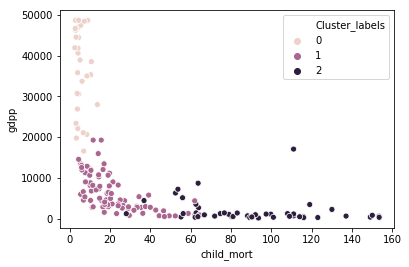

In [92]:
# analyzing the variation between gdpp and child_mort
sns.scatterplot(x = country_dataframe['child_mort'], y =  country_dataframe['gdpp'], hue = country_dataframe['Cluster_labels'])

- Again from the above scatter plot between child_mort and gdpp we can see that countries belonging to cluster 2 have high child_mort and low gdpp.

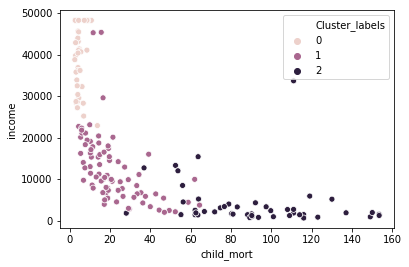

In [93]:
# analyzing the variation between income and child_mort
sns.scatterplot(x = country_dataframe['child_mort'], y = country_dataframe['income'], hue = country_dataframe['Cluster_labels'])

- Again from scatter plot variation between income and child_mort we can see that there are many datapoints of cluster 2 at the lower end i.e. high child_mort and low income levels. Hence the countries belonging to cluster 2 need to be given priority for financial aid.

- So far we have seen K-means clustering on k=3 optimal value obtained from elbow curve and silhouette analysis. Let's also try and analyze the clusters formed when considered k=4 so as to check different possibilities of k.

#### Building the model using K-means considering k=4

In [94]:
# initialzing the model object
kmeans_model_test = KMeans(n_clusters = 4, max_iter= 100, random_state= 100)
# fitting the data on to the model 
kmeans_model_test = kmeans_model_test.fit(numerical_dataframe)

In [95]:
# checking the cluster labels
cluster_labels_test = kmeans_model_test.labels_
# analyzing the cluster labels formed
cluster_labels_test

array([2, 1, 1, 2, 1, 1, 1, 3, 0, 1, 3, 3, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2,
       1, 3, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 3, 3,
       0, 1, 1, 1, 1, 2, 2, 3, 1, 0, 3, 2, 2, 1, 0, 2, 3, 1, 1, 2, 2, 1,
       2, 3, 0, 1, 1, 1, 2, 0, 3, 3, 1, 3, 1, 1, 2, 2, 3, 1, 2, 1, 1, 2,
       2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       0, 3, 2, 2, 0, 3, 2, 1, 1, 1, 1, 1, 3, 0, 1, 1, 2, 1, 3, 2, 1, 3,
       2, 0, 3, 3, 2, 2, 3, 3, 1, 1, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 0, 3, 3, 1, 1, 1, 1, 1, 2, 2])

In [96]:
# adding the column of cluster labels formed upon considering k=4 into dataframes
numerical_dataframe['Cluster_labels_test'] = cluster_labels_test
# adding a column in country dataframe
country_dataframe['Cluster_labels_test'] = cluster_labels_test

In [97]:
# analyzing the dataframe after column addition
country_dataframe.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_labels,Cluster_labels_test
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,20.87,60.1,6.16,3530.0,2,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1,1


- Cluster labels indicate the cluster labels obtained from kmeans when considered the optimal value of k i.e. k=3
- Cluster labels test indicate the cluster labels obtained when k=4

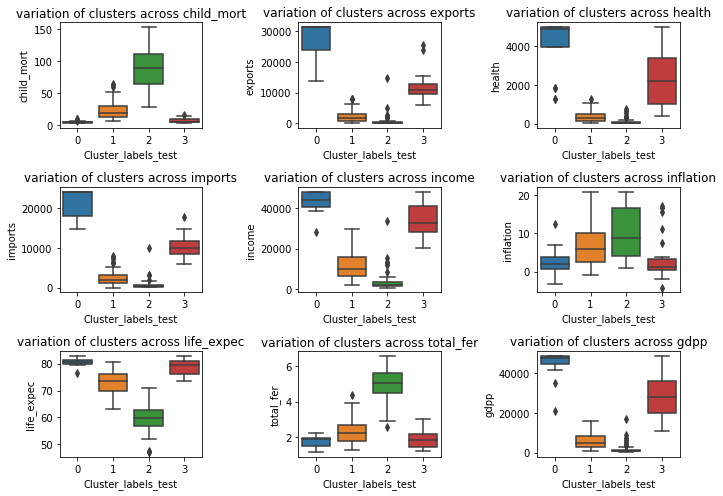

In [98]:
# analyzing the clusters formed when considered k=4 across variables
plt.figure(figsize =(10,7))
for index, column_name in enumerate(numerical_columns_list):
    plt.subplot(3,3,index+1)
    plt.title('variation of clusters across'+' '+column_name)
    sns.boxplot('Cluster_labels_test',column_name, data = country_dataframe)
plt.tight_layout()
plt.show()

- From above plot we can see that in some of the variation of clusters formed is not distinct i.e. doesn't give much distinct informaton from each of the clusters formed. Like in child_mort we can see that the clusters formed for 1 and 3 there variation is almost same hence no distinct information is being explained. When compared to the variation of clusters formed across the variables when considered the optimal k=3 we can obser that each of the cluster gives distinct information which will be further helpgul in making right deicisons. Hence we proceed further with __Cluster profiling using the clusters formed using the optimal k=3.__

- Before proceeding with clustering profiling using the optimal k=3 we drop the column of cluster labels formed by k=4

In [99]:
# Dropping the Cluster_labels_test in country dataframe
country_dataframe.drop('Cluster_labels_test', axis = 1, inplace = True)
# Dropping the Cluster_labels_test in numerical dataframe
numerical_dataframe.drop('Cluster_labels_test', axis = 1, inplace = True)

In [100]:
# analyzing the dataframe after removal
country_dataframe.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,20.87,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


## Cluster Profiling

In [101]:
# analyzing the dataframe again
country_dataframe.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,20.87,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


In [102]:
# creating a groupby object for cluster profiling
cluster_profile = country_dataframe.groupby('Cluster_labels')[['child_mort','income','gdpp']].mean()
# resetting the index of the cluster profile datafame
cluster_profile = cluster_profile.reset_index()
# analyzing the cluster profile dataframe
cluster_profile

,Cluster_labels,child_mort,income,gdpp
0,0,5.237838,38711.081081,37745.675676
1,1,21.951220,12304.756098,6287.463415
2,2,90.335417,3897.354167,1909.208333


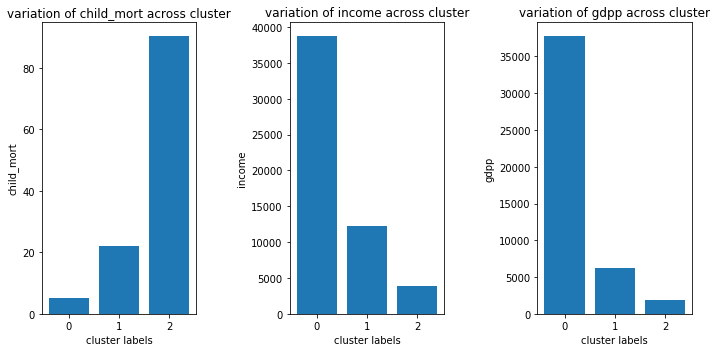

In [103]:
# Plotting the bar plot of the cluster profile
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.title('variation of child_mort across cluster')
plt.bar(cluster_profile['Cluster_labels'], cluster_profile['child_mort'])
plt.xticks([0,1,2])
plt.ylabel('child_mort')
plt.xlabel('cluster labels')
plt.subplot(1,3,2)
plt.title('variation of income across cluster')
plt.bar(cluster_profile['Cluster_labels'], cluster_profile['income'])
plt.xticks([0,1,2])
plt.xlabel('cluster labels')
plt.ylabel('income')
plt.subplot(1,3,3)
plt.title('variation of gdpp across cluster')
plt.bar(cluster_profile['Cluster_labels'], cluster_profile['gdpp'])
plt.xticks([0,1,2])
plt.xlabel('cluster labels')
plt.ylabel('gdpp')
plt.tight_layout()
plt.show()

- From above bar plots we can see that cluster 2 has high child_mort, low gdpp and low income. Hence the countries belonging to cluster 2 need to be given priority for financial aid.

## Country Identification using KMeans Clustering

#### Analyzing the countries in different clusters

In [104]:
# creating cluster 0 dataframe
cluster0_dataframe = country_dataframe[country_dataframe['Cluster_labels'] == 0]
# analyzing the cluster0_dataframe
cluster0_dataframe.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_labels
7,Australia,4.8,10276.2,4530.870,10847.10,41400.0,1.160,82.0,1.93,48610.0,0
8,Austria,4.3,24059.7,4966.701,22418.20,43200.0,0.873,80.5,1.44,46900.0,0
10,Bahamas,13.8,9800.0,2209.200,12236.00,22900.0,-0.393,73.8,1.86,28000.0,0
11,Bahrain,8.6,14386.5,1028.790,10536.30,41100.0,7.440,76.0,2.16,20700.0,0
15,Belgium,4.5,31385.1,4750.800,24241.56,41100.0,1.880,80.0,1.86,44400.0,0


In [105]:
# creating cluster 1 dataframe
cluster1_dataframe = country_dataframe[country_dataframe['Cluster_labels'] == 1]
# analyzing the cluster 1 dataframe
cluster1_dataframe.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_labels
1,Albania,16.6,1145.20,267.895,1987.74,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.982,1400.44,12900.0,16.10,76.5,2.89,4460.0,1
4,Antigua and Barbuda,10.3,5551.00,735.660,7185.80,19100.0,1.44,76.8,2.13,12200.0,1
5,Argentina,14.5,1946.70,834.300,1648.00,18700.0,20.87,75.8,2.37,10300.0,1
6,Armenia,18.1,669.76,141.680,1458.66,6700.0,7.77,73.3,1.69,3220.0,1


In [106]:
# creating cluster 2 dataframe
cluster2_dataframe = country_dataframe[country_dataframe['Cluster_labels'] == 2]
# analyzing the cluster 2 dataframe
cluster2_dataframe.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_labels
0,Afghanistan,90.2,55.300,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,2
3,Angola,119.0,2199.190,100.6050,1514.370,5900.0,20.870,60.1,6.16,3530.0,2
17,Benin,111.0,180.404,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,2
21,Botswana,52.5,2768.600,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350.0,2
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,2


- As per above analysis it is decided that countries belonging to cluster 2 need more priority in financial assistance.

#### Considering Top 5 countries which need financial assistance considering socio economic & health factors

In [107]:
# considering subset of the dataframe for determining the top 5 countries
subset_dataframe_kmeans = country_dataframe[['country', 'child_mort', 'income', 'gdpp']]
# analyzing the cusbset dataframe
subset_dataframe_kmeans.head()

,country,child_mort,income,gdpp
0,Afghanistan,90.2,1610.0,553.0
1,Albania,16.6,9930.0,4090.0
2,Algeria,27.3,12900.0,4460.0
3,Angola,119.0,5900.0,3530.0
4,Antigua and Barbuda,10.3,19100.0,12200.0


In [108]:
# Sorting the subset dataframe for picking right top 5 contries
subset_dataframe_kmeans.sort_values(by = ['gdpp', 'child_mort', 'income'], ascending = [True,False,True], inplace = True)

In [109]:
# analyzing the dataframe after sorting as per the requirements for identification
subset_dataframe_kmeans.head()

,country,child_mort,income,gdpp
26,Burundi,93.6,764.0,231.0
88,Liberia,89.3,700.0,327.0
37,"Congo, Dem. Rep.",116.0,609.0,334.0
112,Niger,123.0,814.0,348.0
132,Sierra Leone,153.4,1220.0,399.0


In [110]:
# creating top 5 countries series
top5_countries = subset_dataframe_kmeans['country'].head()
# analyzing the top 5 countries
print(top5_countries)

26              Burundi
88              Liberia
37     Congo, Dem. Rep.
112               Niger
132        Sierra Leone
Name: country, dtype: object


__Hence the Top 5 countries which require financial aid in priority are as per KMeans:__
- Burundi
- Liberia
- Congo, Dem. Rep.
- Niger
- Sierra Leone

# Modeling using Hierarchial Clustering

__The steps involved in hierarchical clustering are:__
- Defining the linkage on the dataframe
- Building dendrogram
- Cutting the dendrogram

#### Performing Hierarchical clustering using Single Linkage method

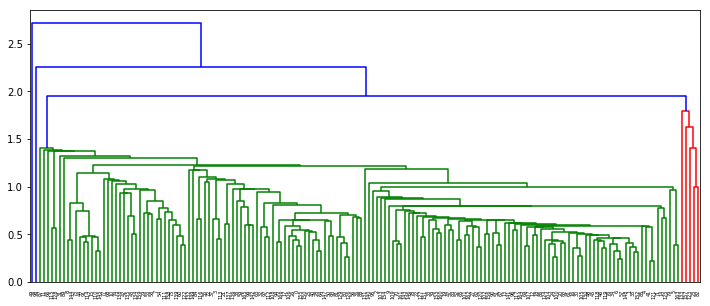

In [111]:
# Defining the mergings using the linkage function
mergings_single = linkage(numerical_dataframe, method = 'single', metric= 'euclidean')
# plotting dendrogram of the single linkage
plt.figure(figsize= (12,5))
dendrogram(mergings_single)
plt.show()

- From the above dendrogram for the single linkage we can see that there exists major cluster mergings of green datapoints when compared to other cluster fusions. In business persceptive managining small clusters would be difficult to track. Hence we better perform complete linkage method and check for the shape of the dendrogram.

#### Performing Hierarchical clustering using complete linkage

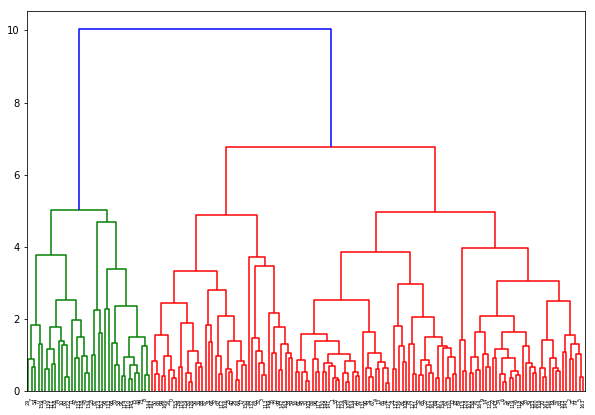

In [112]:
# defining mergings using complete linkage
mergings_complete = linkage(numerical_dataframe, method = 'complete', metric = 'euclidean')
# plotting the dendrogram
plt.figure(figsize=(10,7))
dendrogram(mergings_complete)
plt.show()

- From above dendrogram using complete linkage we can see that the clusters have been fused properly and also there doesn't exists any small clusters indiviually. The clusters fused together are also distinct to each other and have merged/fused at consdierable heights of measure of disimilarity.

###### Choosing one method based on the results from hierarchical clustering  based on linkages
- From above observations we can see that complete linkage produces better and distinct clusters. Hence we will proceed with complete linkage hierarchical clustering method.

In [113]:
# Cutting the dendrogram formed by complete linkage
cluster_labels_hierarchical = cut_tree(mergings_complete, n_clusters= 2)
# analyzing the cluster labels formed upon cutting the dendrogram
cluster_labels_hierarchical

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
    

In [114]:
# analyzing the shape of the cluster labels formed from hierarchical clustering
cluster_labels_hierarchical.shape

(167, 1)

- We can see that shape of the cluster labels formed from hierarchical complete linkage clustering. In order to assign the cluster labels as a column into the dataframe we need to reshape the cluster_labels_hierarchical into an single dimension array.

In [115]:
# reshaping the cluster_labels_hierarchical
cluster_labels_hierarchical = cluster_labels_hierarchical.reshape(-1,)

# analyzing the shape of the cluter_labels_hierarchical after reshaping
cluster_labels_hierarchical.shape

(167,)

- We can see that the cluster labels obtained from hierarchical complete linkage have been reshaped into single dimension array. Now using this array we can create a column in the dataframe.

###### Assigning the cluster labels as a column in the datafarmes

In [116]:
# assigning as a column in numerical datafarme
numerical_dataframe['Cluster_labels_hierarchical'] = cluster_labels_hierarchical

# assigning cluster labels in country dataframe
country_dataframe['Cluster_labels_hierarchical'] =  cluster_labels_hierarchical

In [117]:
# analyzing the country datafram after addition of column
country_dataframe.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_labels,Cluster_labels_hierarchical
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,20.87,60.1,6.16,3530.0,2,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1,0


###### Analyzing the clusters formed using hierarchical clustering (Complete Linkage)

In [118]:
# analyzing the value counts of the data points in each cluster
country_dataframe['Cluster_labels_hierarchical'].value_counts()

0    130
1     37
Name: Cluster_labels_hierarchical, dtype: int64

#### Visualzing the clusters formed using hierarchical clustering

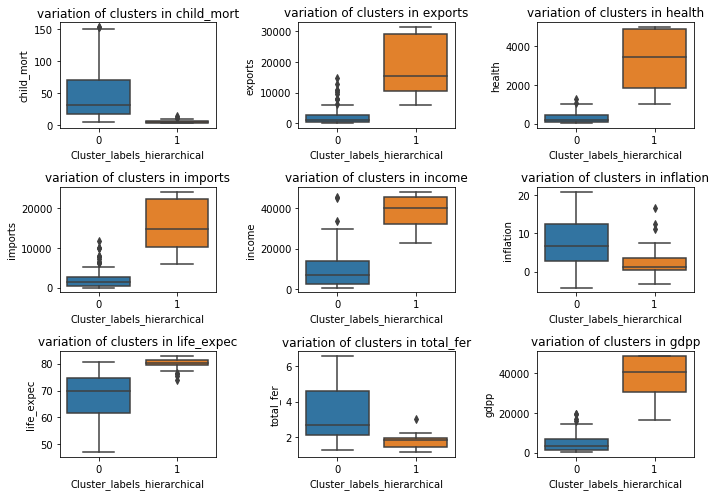

In [119]:
# analyzing teh clusters formed across all numericla variables
plt.figure(figsize=(10,7))
for index, column_name in enumerate(numerical_columns_list):
    plt.subplot(3,3,index+1)
    plt.title('variation of clusters in'+' '+column_name)
    sns.boxplot('Cluster_labels_hierarchical',column_name, data =  country_dataframe)
plt.tight_layout()
plt.show()

- From above we can see that based on the driving variables like income, gdpp and child_mort the countries belonging to cluster 0 having low gdpp, low income and high child_mort. Hence the countries in cluster 0 need to be taken for financial aid consideration in priority.

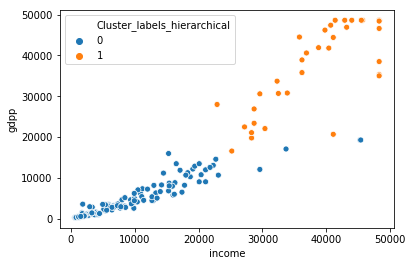

In [120]:
# Visualizing the varaiation between income and gdpp using hue as cluster labels
sns.scatterplot(country_dataframe['income'], country_dataframe['gdpp'], hue =country_dataframe['Cluster_labels_hierarchical'])

- From the above plot we can see that there exists many data points in the lower end of the plot i.e low income and low income. Hence it is an indication that countries belonging to cluster 0 have relatively low income and low gdpp.

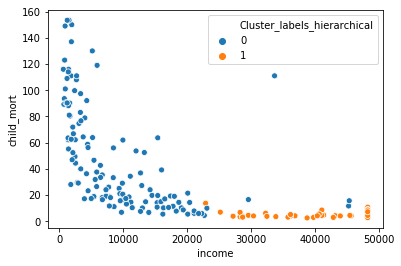

In [121]:
# Visualizing the variation between income and child_mort
sns.scatterplot(country_dataframe['income'], country_dataframe['child_mort'], hue = country_dataframe['Cluster_labels_hierarchical'])

- From the above sctter plot between income and child_mort we can see that countries belonging to cluster 0 have high child_mort and low income levels.

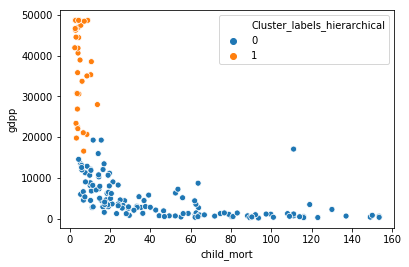

In [122]:
# Visualizing the variation between child_mort and gdpp
sns.scatterplot(country_dataframe['child_mort'], country_dataframe['gdpp'], hue = country_dataframe['Cluster_labels_hierarchical'])

- Again from the above scatter plot we can see that countries belonging to cluster 0 have  low gdpp and high child_mort.

- Hence from all above visualization it is sure that we have take into consideration of countries in cluster 0 in priority for financial aid. Hence lets perform cluster profiling and decide the top 5 countries which need financial aid in priority.

## Cluster Profiling using Hierarchical clustering

In [123]:
# analyzing the dataframe again
country_dataframe.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_labels,Cluster_labels_hierarchical
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,20.87,60.1,6.16,3530.0,2,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1,0


- The Cluster_labels : obtained from Kmeans
- The Cluster_labels_hierarchical : obatined from hierarchical complete linkage

In [124]:
# defining a dataframe considering only the driving variables using group by
cluster_profile_hierarchical = country_dataframe.groupby('Cluster_labels_hierarchical')[['child_mort','income','gdpp']].mean()
# resetting the index of the cluster profile
cluster_profile_hierarchical = cluster_profile_hierarchical.reset_index()
# analyzing the cluter profile created using hierarchical clustering
cluster_profile_hierarchical

,Cluster_labels_hierarchical,child_mort,income,gdpp
0,0,47.200769,9200.484615,4670.876923
1,1,5.237838,38711.081081,37745.675676


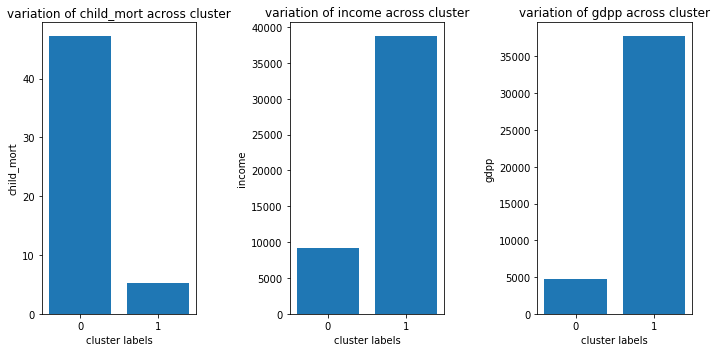

In [125]:
# plotting the cluster profile using bar plot
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.title('variation of child_mort across cluster')
plt.bar(cluster_profile_hierarchical['Cluster_labels_hierarchical'], cluster_profile_hierarchical['child_mort'])
plt.xticks([0,1])
plt.ylabel('child_mort')
plt.xlabel('cluster labels')
plt.subplot(1,3,2)
plt.title('variation of income across cluster')
plt.bar(cluster_profile_hierarchical['Cluster_labels_hierarchical'], cluster_profile_hierarchical['income'])
plt.xticks([0,1])
plt.xlabel('cluster labels')
plt.ylabel('income')
plt.subplot(1,3,3)
plt.title('variation of gdpp across cluster')
plt.bar(cluster_profile_hierarchical['Cluster_labels_hierarchical'], cluster_profile_hierarchical['gdpp'])
plt.xticks([0,1])
plt.xlabel('cluster labels')
plt.ylabel('gdpp')
plt.tight_layout()
plt.show()

- From above variation in bar plots we can see contries belonging to cluster 0 have high child_mort, low income and low gdpp. Hence countries in cluster 0 needed to taken in priority for financial aid.

## Country identification using hierarchical clustering

#### Analyzing indiviual clusters

In [126]:
# creating cluster 0 dataframe formed from hierarchical
cluster0_dataframe_hierarchical = country_dataframe[country_dataframe['Cluster_labels_hierarchical'] == 0]
# analyzing the cluster 0 dataframe
cluster0_dataframe_hierarchical.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_labels,Cluster_labels_hierarchical
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,20.87,60.1,6.16,3530.0,2,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1,0


In [127]:
# creating cluster 1 dataframe
cluster1_dataframe_hierarchical = country_dataframe[country_dataframe['Cluster_labels_hierarchical'] == 1]
# analyzing the cluster 1 dataframe
cluster1_dataframe_hierarchical.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_labels,Cluster_labels_hierarchical
7,Australia,4.8,10276.2,4530.870,10847.10,41400.0,1.160,82.0,1.93,48610.0,0,1
8,Austria,4.3,24059.7,4966.701,22418.20,43200.0,0.873,80.5,1.44,46900.0,0,1
10,Bahamas,13.8,9800.0,2209.200,12236.00,22900.0,-0.393,73.8,1.86,28000.0,0,1
11,Bahrain,8.6,14386.5,1028.790,10536.30,41100.0,7.440,76.0,2.16,20700.0,0,1
15,Belgium,4.5,31385.1,4750.800,24241.56,41100.0,1.880,80.0,1.86,44400.0,0,1


In [128]:
# creating subset dataframe considering the driving variables
subset_dataframe_hierarchical = country_dataframe[['country','child_mort','income','gdpp']]
# analyzing the subset dataframe
subset_dataframe_hierarchical.head()

,country,child_mort,income,gdpp
0,Afghanistan,90.2,1610.0,553.0
1,Albania,16.6,9930.0,4090.0
2,Algeria,27.3,12900.0,4460.0
3,Angola,119.0,5900.0,3530.0
4,Antigua and Barbuda,10.3,19100.0,12200.0


In [129]:
# sorting the driving variables for identification of top 5 countries
subset_dataframe_hierarchical.sort_values(by = ['gdpp','child_mort','income'], ascending = [True,False,True], inplace = True)
# analyzing the dataframe after sorting
subset_dataframe_hierarchical.head()

,country,child_mort,income,gdpp
26,Burundi,93.6,764.0,231.0
88,Liberia,89.3,700.0,327.0
37,"Congo, Dem. Rep.",116.0,609.0,334.0
112,Niger,123.0,814.0,348.0
132,Sierra Leone,153.4,1220.0,399.0


In [130]:
# creating top 5 countries series
top5_countries_hierarchical = subset_dataframe_hierarchical['country'].head()
# analyzing the top 5 countries 
top5_countries_hierarchical

26              Burundi
88              Liberia
37     Congo, Dem. Rep.
112               Niger
132        Sierra Leone
Name: country, dtype: object

__Hence the Top 5 countries which require financial aid in priority are as per Hierarchical clustering:__
- Burundi
- Liberia
- Congo, Dem. Rep.
- Niger
- Sierra Leone

# Final list of countries

Upon performing clustering analysis using both KMeans and Hierarchical we get same top 5 countries which need financial assistance in priority as the countries socio-economic conditions is poor. Hence these countries need financial aid in priority. The top 5 countries are:
- Burundi
- Liberia
- Congo, Dem. Rep.
- Niger
- Sierra Leone

###### Small summary differences between clustering process

- Though Hierarchical and KMeans clustering techniques have given same top 5 countries but the clusters formed using KMeans are much more interpretable than cluster formed in Hierarchical clustering. In Hierarchical the cluster formed are 2 but in practical scenario making 2 clusters out of the data is not meaningful as it just divides the data into two parts based on the similarities present in the data. But if there are intermdiate countries exists they will also clustered into any one of the clusters. Upon making 2 clusters we will missing out the intermediate behaviour countries. Hence making more than 2 cluters is meaningful. In Kmeans upon identifying the optimal nunmber of clusters to e formed it turned out to be 3 clusters and also the clusters formed in KMeans displays distinct differences present between the clusters which will be helpful in making right decisions. Hence the clusters formed using KMeans can be considered for interpretation.